In [24]:
def tail(filename, lines=10):
    with open(filename, 'rb') as file:
        # Move the file pointer to the end
        file.seek(0, 2)
        # Find the start position of the last n lines
        pos = file.tell()
        lines_found = 0
        while pos > 0 and lines_found < lines:
            pos -= 1
            file.seek(pos)
            if file.read(1) == b'\n':
                lines_found += 1

        # Read the last n lines
        last_lines = file.readlines()[-lines:]

    return last_lines


In [25]:
# Tweak path before importing
import sys

sys.path.insert(0, '..')

import nn_rbf
import torch

In [26]:
# Load verification data
x_verification = torch.linspace(0, 2, 1000)
y_verification = torch.exp(x_verification)

import matplotlib.pyplot as plt

N = 5

In [27]:
N = 5

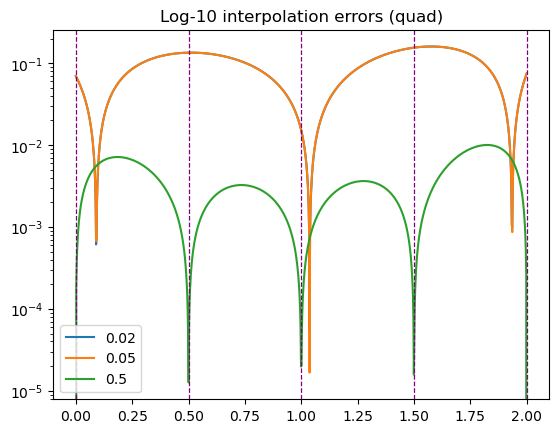

In [29]:
for float_coef in ['0.02', '0.05', '0.5']:
    filename = f'../coefs_poly/deg2-5-{float_coef}.csv'
    result = tail(filename, lines=2)
    parsed_result = result[0].decode('utf-8')[:-2]
    
    # Get list of parameters
    alphas_list = [float(entry) for entry in parsed_result.split(',')[:-4]]
    coefficients = [float(entry) for entry in parsed_result.split(',')[-4:-1]]

    # Get interpolant
    centers = torch.linspace(0, 2, N)
    interp = nn_rbf.PolynomialRBFInterpolant(centers = centers, eps = float(float_coef), alphas = alphas_list, coefficients=coefficients)

    # Get errors list
    errors_list = torch.abs(y_verification - interp(x_verification)).detach().numpy()

    plt.semilogy(x_verification.detach(), torch.abs(y_verification - interp(x_verification)).detach().numpy(), label=float_coef)
plt.title('Log-10 interpolation errors (quad)')
for x in torch.linspace(0, 2, N).detach().numpy():
    plt.axvline(x, linestyle='--', linewidth=.9, color = 'purple')
plt.legend()
plt.show()

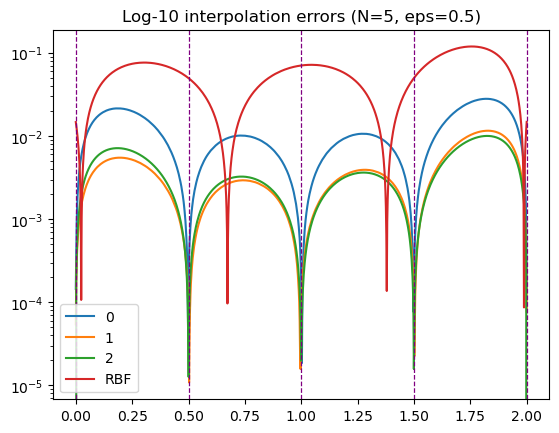

In [30]:
# for filename in ['../coefs_poly/quad-5-0.5.csv', '../coefs/5-0.5.csv']:

centers = torch.linspace(0, 2, N)
for degree in [0, 1, 2]:

    result = tail(f'../coefs_poly/deg{degree}-5-0.5.csv', lines=2)
    parsed_result = result[0].decode('utf-8')[:-2]

    last_index = -2 - degree
    # Get list of parameters
    alphas_list = [float(entry) for entry in parsed_result.split(',')[:last_index]]
    coefficients = [float(entry) for entry in parsed_result.split(',')[last_index:-1]]

    # Get interpolant
    interp = nn_rbf.PolynomialRBFInterpolant(centers = centers, eps = 0.5, alphas = alphas_list, coefficients=coefficients)

    # Get errors list
    errors_list = torch.abs(y_verification - interp(x_verification)).detach().numpy()

    plt.semilogy(x_verification.detach(), torch.abs(y_verification - interp(x_verification)).detach().numpy(), label=f'{degree}')


######################

result = tail('../coefs/5-0.5.csv', lines=2)
parsed_result = result[0].decode('utf-8')[:-2]

# Get list of parameters
alphas_list = [float(entry) for entry in parsed_result.split(',')[:-1]]
interp = nn_rbf.RBFInterpolant(centers = centers, eps = 0.5, alphas = alphas_list)

# Get errors list
errors_list = torch.abs(y_verification - interp(x_verification)).detach().numpy()

plt.semilogy(x_verification.detach(), torch.abs(y_verification - interp(x_verification)).detach().numpy(), label='RBF')

plt.title(f'Log-10 interpolation errors (N={N}, eps=0.5)')
for x in torch.linspace(0, 2, N).detach().numpy():
    plt.axvline(x, linestyle='--', linewidth=.9, color = 'purple')
plt.legend()
plt.show()

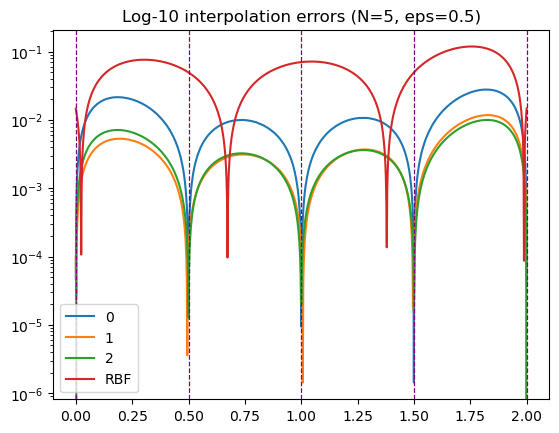

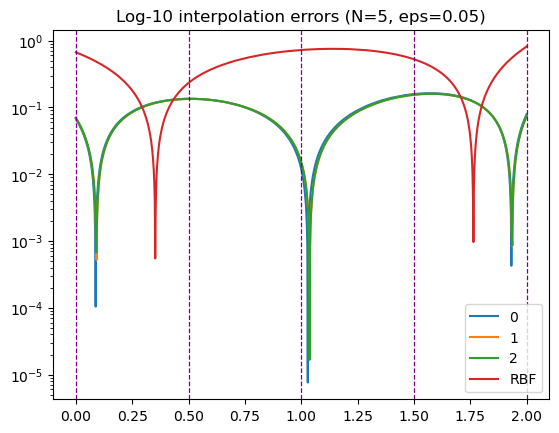

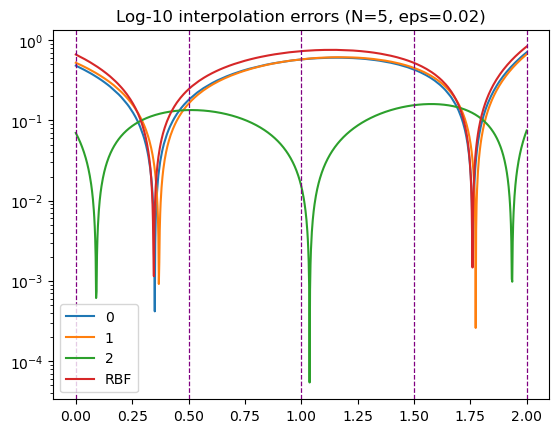

In [31]:
for eps_str in ['0.5', '0.05', '0.02']:
    centers = torch.linspace(0, 2, N)
    for degree in [0, 1, 2]:

        result = tail(f'../coefs_poly/deg{degree}-5-{eps_str}.csv', lines=2)
        parsed_result = result[0].decode('utf-8')[:-2]

        last_index = -2 - degree
        # Get list of parameters
        alphas_list = [float(entry) for entry in parsed_result.split(',')[:last_index]]
        coefficients = [float(entry) for entry in parsed_result.split(',')[last_index:-1]]

        # Get interpolant
        interp = nn_rbf.PolynomialRBFInterpolant(centers = centers, eps = float(eps_str), alphas = alphas_list, coefficients=coefficients)

        # Get errors list
        errors_list = torch.abs(y_verification - interp(x_verification)).detach().numpy()

        plt.semilogy(x_verification.detach(), torch.abs(y_verification - interp(x_verification)).detach().numpy(), label=f'{degree}')


    ######################

    result = tail(f'../coefs/5-{eps_str}.csv', lines=2)
    parsed_result = result[0].decode('utf-8')[:-2]

    # Get list of parameters
    alphas_list = [float(entry) for entry in parsed_result.split(',')[:-1]]
    interp = nn_rbf.RBFInterpolant(centers = centers, eps = float(eps_str), alphas = alphas_list)

    # Get errors list
    errors_list = torch.abs(y_verification - interp(x_verification)).detach().numpy()

    plt.semilogy(x_verification.detach(), torch.abs(y_verification - interp(x_verification)).detach().numpy(), label='RBF')

    plt.title(f'Log-10 interpolation errors (N={N}, eps={eps_str})')
    for x in torch.linspace(0, 2, N).detach().numpy():
        plt.axvline(x, linestyle='--', linewidth=.9, color = 'purple')
    plt.legend()
    plt.show()